<a href="https://colab.research.google.com/github/hilalakhal/Final-Assignment-Project/blob/main/skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import initial library
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#accessing the drive for dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the dataset
dataset = pd.read_csv('/content/drive/My Drive/dataset(2) (1).csv', header=[0,1])

In [ ]:
#accessing the data
#X variabel on coloumn 9th,10th,11th
X = dataset.iloc[:51, [9,10,11]].values
#y variabel on coloumn 12th
y = dataset.iloc[:51, [12]].values

#defining the ratio for data splitting
train_size = int(0.8 * len(X))

#devide the variable X and y into training and testing
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [ ]:
#reshapping the y train
#this is neccessary because if we didn't do this, the code will error
y_train = y_train.reshape(-1,1)

In [ ]:
#standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
y_train_scaled = sc.fit_transform(y_train)

In [ ]:
#this is also neccessary with the same reason as reshapping
y_train_scaled= y_train_scaled.ravel()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#defining the parameters that will be used
svm_linear = {'C': [0.1, 1, 10, 100], 'epsilon': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1], 'kernel': ['linear']}
svm_rbf = {'C': [0.1, 1, 10, 100], 'epsilon': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1], 'gamma': [0.1, 1, 10,], 'kernel': ['rbf']}

#call the svr model
svr = SVR()

#intializing the gridsearch
clf_linear = GridSearchCV(svr, param_grid=svm_linear)
clf_rbf = GridSearchCV(svr, param_grid=svm_rbf)

In [ ]:
#fitting model to the data
#kernel linear
clf_linear.fit(X_train_scaled, y_train_scaled)

#kernel rbf
clf_rbf.fit(X_train_scaled, y_train_scaled)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'gamma': [0.1, 1, 10], 'kernel': ['rbf']})

In [ ]:
#print the best parameters that found
print("Best parameters linear kernel found: ", clf_linear.best_params_)
print("Best parameters rbf kernel found: ", clf_rbf.best_params_)

Best parameters linear kernel found:  {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
Best parameters rbf kernel found:  {'C': 1, 'epsilon': 1e-05, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
#call the defult model as comparison later
svr.fit(X_train_scaled, y_train_scaled)

SVR()

MODEL PERFORMANCE ON TRAINING SET

In [ ]:
#do the prediction for training set so we can know the model performance
#note : this is training set
#kernel linear
train_pred_linear = clf_linear.predict(X_train_scaled)
train_pred_linear = train_pred_linear.reshape(-1,1)
train_pred_linear = sc.inverse_transform(train_pred_linear)

#calculate the performance
from sklearn.metrics import r2_score,mean_absolute_percentage_error, mean_squared_error
mape_train_linear = mean_absolute_percentage_error(y_train, train_pred_linear)
r2_train_linear = r2_score(y_train, train_pred_linear)
print(r2_train_linear, mape_train_linear)

0.5730071237417946 0.08923318491317915


In [ ]:
#kernel rbf
train_pred_rbf = clf_rbf.predict(X_train_scaled)
train_pred_rbf = train_pred_rbf.reshape(-1,1)
train_pred_rbf = sc.inverse_transform(train_pred_rbf)

#calculate the performance
mape_train_rbf = mean_absolute_percentage_error(y_train, train_pred_rbf)
r2_train_rbf = r2_score(y_train, train_pred_rbf)
print(r2_train_rbf, mape_train_rbf)

0.6108425425767529 0.08251583002406


In [ ]:
#default parameters
train_pred_def = svr.predict(X_train_scaled)
train_pred_def = train_pred_def.reshape(-1,1)
train_pred_def = sc.inverse_transform(train_pred_def)

#calculate the performance
mape_train_def = mean_absolute_percentage_error(y_train, train_pred_def)
r2_train_def = r2_score(y_train, train_pred_def)
print(r2_train_def, mape_train_def)

0.6744046066317673 0.07458397425993943


MODEL EVALUATION
USING TESTING SET

In [ ]:
#kernel linear
y_pred_linear = clf_linear.predict(X_test_scaled)
y_pred_linear = y_pred_linear.reshape(-1,1)
y_pred_linear = sc.inverse_transform(y_pred_linear)
print(y_pred_linear)

#calculate the performance
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
print(mape_linear)

[[20844.73053993]
 [21621.61810086]
 [21153.39711507]
 [20858.92091146]
 [23638.22252362]
 [24316.79095241]
 [23285.03553206]
 [21639.91133159]
 [22383.17358569]
 [20299.68703607]
 [21578.19077767]]
0.0820907510531389


In [ ]:
#kernel rbf
y_pred_rbf = clf_rbf.predict(X_test_scaled)
y_pred_rbf = y_pred_rbf.reshape(-1,1)
y_pred_rbf = sc.inverse_transform(y_pred_rbf)
print(y_pred_rbf)

#calculate the performance
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf)
print(mape_rbf)

[[21171.50015128]
 [21493.44042311]
 [21338.24196186]
 [21123.1896261 ]
 [22210.95786967]
 [22233.45740011]
 [22228.09331707]
 [22058.39095515]
 [22026.01807469]
 [21030.18826513]
 [21213.45311379]]
0.07571721487378733


In [ ]:
#default parameters
y_pred_default = svr.predict(X_test_scaled)
y_pred_default = y_pred_default.reshape(-1,1)
y_pred_default = sc.inverse_transform(y_pred_default)
print(y_pred_default)

#calculate the performance
mape_def = mean_absolute_percentage_error(y_test, y_pred_default)
print(mape_def)

[[21081.83515805]
 [21412.47877847]
 [21487.11797111]
 [21301.16609938]
 [22182.63784458]
 [21334.30386664]
 [21183.04776939]
 [21956.84304748]
 [21755.93957188]
 [20880.39622589]
 [20658.70241034]]
0.07385960139787959


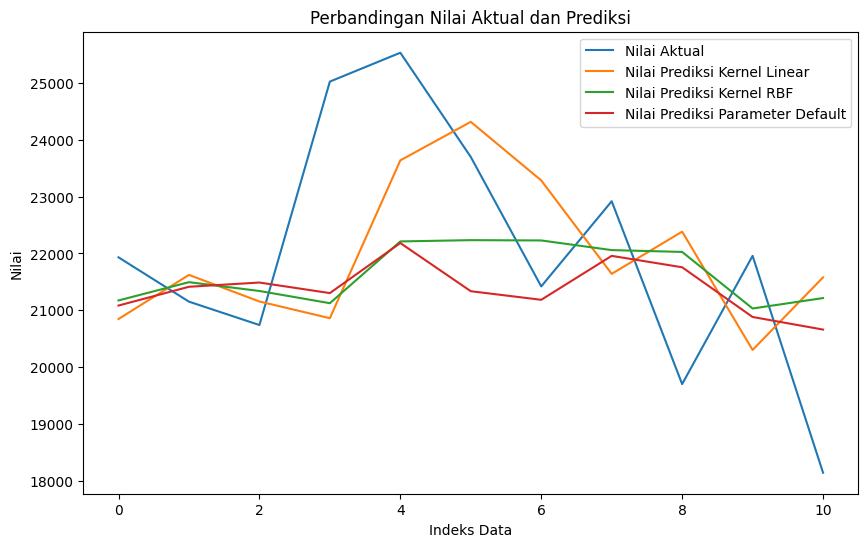

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Nilai Aktual')
plt.plot(y_pred_linear, label='Nilai Prediksi Kernel Linear')
plt.plot(y_pred_rbf, label='Nilai Prediksi Kernel RBF')
plt.plot(y_pred_default, label='Nilai Prediksi Parameter Default')
plt.title('Perbandingan Nilai Aktual dan Prediksi')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai')
plt.legend()
plt.show()

DO PERDICTION FOR THE NEXT SIXTH MONTHS (MANUALLY INSERT THE DATA)

In [ ]:
#do the prediction
#input = last 3 months
#input is manually inserted
new_input = np.array([19186.948, 19230.21085354, 19212.687])
new_input = new_input.reshape(-1,1)
new_input = sc.fit_transform(new_input)
new_input = new_input.reshape(-1,3)

In [ ]:
#show the results for a month after
prediction = clf_rbf.predict(new_input)
prediction = prediction.reshape(-1,1)
prediction = sc.inverse_transform(prediction)
print(prediction)

[[19214.64161845]]
